<a href="https://colab.research.google.com/github/NaHyeonMaeng/CODE_Practice/blob/main/mnist_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functional API 모델 생성

In [3]:
#import
import tensorflow as tf
import numpy as np

In [4]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
#새로운 출력 값 배열 생성 (홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [6]:
#train 배열 출력 후 비교
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [7]:
#Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [8]:
#정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

#채널추가
x_train_in = tf.expand_dims(x_train,-1)
x_valid_in = tf.expand_dims(x_valid,-1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
#Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

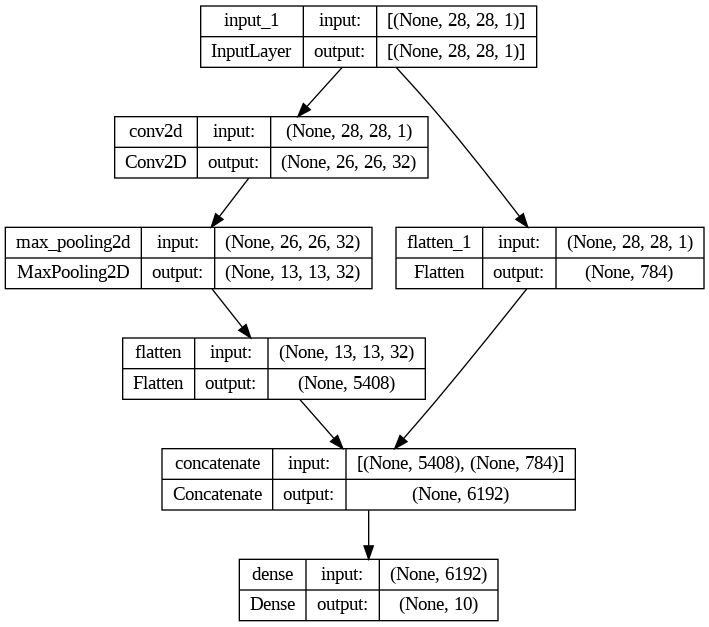

In [10]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [11]:
#모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

#모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.2106 - accuracy: 0.9401 - val_loss: 0.0874 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9822 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0609 - val_accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0520 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0532 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0583 - val_accuracy

다중 출력 분류 모델

In [12]:
#Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name = 'inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [13]:
#모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


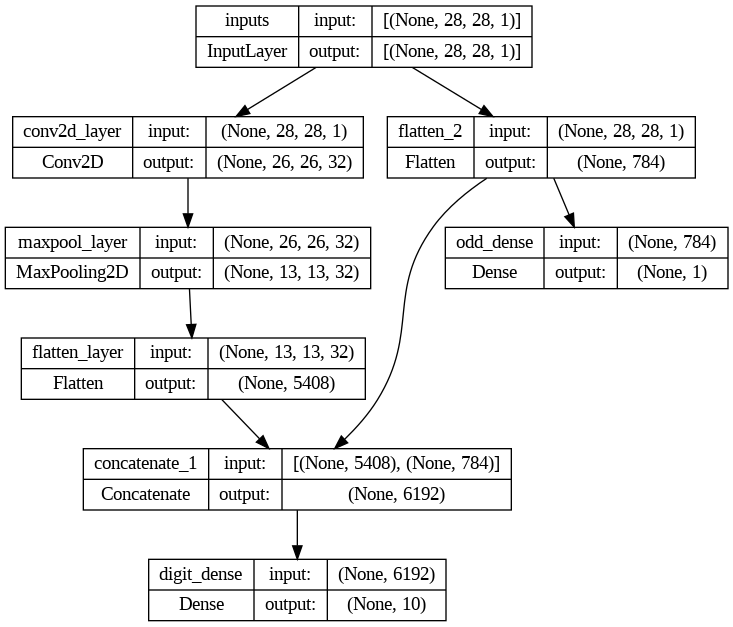

In [14]:
#모델구조 시각화
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'multi_output_cnn.png')

In [15]:
#모델 컴파일
model.compile(optimizer = 'adam', loss = {'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights = {'digit_dense':1, 'odd_dense':0.5},
              metrics=['accuracy'])

#모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense': y_train_odd},
                    validation_data = ({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), epochs=10)

#모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3704 - digit_dense_loss: 0.2084 - odd_dense_loss: 0.3240 - digit_dense_accuracy: 0.9418 - odd_dense_accuracy: 0.8650 - val_loss: 0.2262 - val_digit_dense_loss: 0.0892 - val_odd_dense_loss: 0.2740 - val_digit_dense_accuracy: 0.9722 - val_odd_dense_accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2149 - digit_dense_loss: 0.0791 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9775 - odd_dense_accuracy: 0.8912 - val_loss: 0.1975 - val_digit_dense_loss: 0.0661 - val_odd_dense_loss: 0.2628 - val_digit_dense_accuracy: 0.9793 - val_odd_dense_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1900 - digit_dense_loss: 0.0587 - odd_dense_loss: 0.2624 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.8963 - val_loss: 0.1857 - val_digit_dense_loss: 0.0568 - val_odd_dense_loss: 0.2578 - val_digit_dense_accuracy: 0.9808 - val_

[0.18906232714653015,
 0.06139940768480301,
 0.255325585603714,
 0.983299970626831,
 0.9017999768257141]

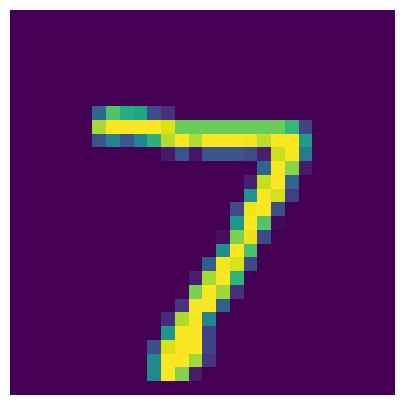

In [16]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [17]:
#2개의 분류 문제에 대한 예측 확률 구하기
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 2ms/step
[1.5913949e-12 5.0543108e-11 2.3863119e-08 3.5131454e-06 4.3852665e-12
 8.9309311e-14 1.2714909e-20 9.9999642e-01 1.3705965e-09 3.4317287e-09]
[0.99962354]


In [18]:
#'다중분류'의 예측 확률을 실제 정답 레이블로 변환
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [19]:
#'이진분류'의 예측 레이블 출력
odd_labels = (odd_preds>0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-19-c818b1ae1791>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds>0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

전이학습

In [20]:
#앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

#앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


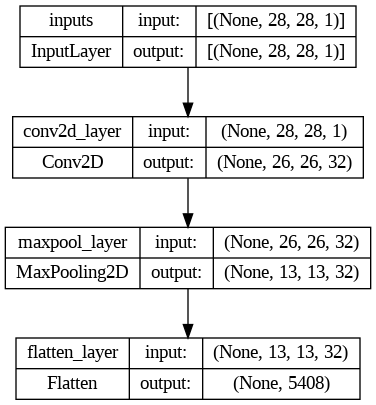

In [21]:
#시각화
plot_model(base_model, show_shapes = True, show_layer_names = True, to_file = 'base_model.png')

In [22]:
#Sequential API 적용 -> Dense 레이어 새롭게 추가
digit_model = tf.keras.Sequential([base_model, tf.keras.layers.Dense(10, activation = 'softmax')])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


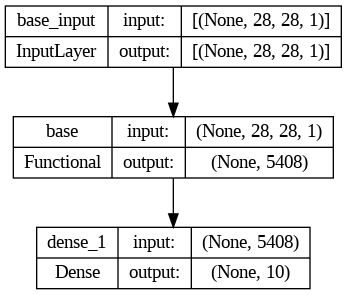

In [23]:
#시각화
plot_model(digit_model, show_shapes = True, show_layer_names = True, to_file = 'digit_model.png')

In [24]:
#모델 컴파일
digit_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1322 - accuracy: 0.9625 - val_loss: 0.0630 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 0.0539 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0515 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0532 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0576 - val_accurac

In [28]:
#베이스 모델의 가중치 고정(Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [29]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation ='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input, outputs = dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [30]:
#모델 컴파일
digit_model_frozen.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1174 - accuracy: 0.9683 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0489 - accuracy: 0.9855 - val_loss: 0.0518 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0524 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0494 - val_accuracy:

In [32]:
#베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [33]:
#Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation ='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input, outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [34]:
#모델 컴파일
digit_model_frozen2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1159 - accuracy: 0.9682 - val_loss: 0.0556 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9861 - val_loss: 0.0570 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0515 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0547 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0588 - val_accuracy: